In [1]:
!pip install xgboost

You should consider upgrading via the 'C:\Users\Dell_Owner\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


     -------------------------------------- 125.4/125.4 MB 1.8 MB/s eta 0:00:00


In [58]:
import pandas as pd
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_excel("Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx")

In [7]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [9]:
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091224e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [20]:
x = df['Class'].value_counts().values

In [21]:
y = df['Class'].value_counts().index

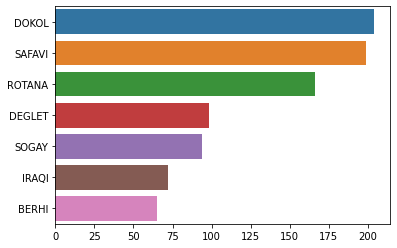

In [22]:
sns.barplot(x=x, y=y);

In [32]:
df = df.drop(columns=['Class'])


In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [35]:
encoder = LabelEncoder()
df['Class'] = encoder.fit_transform(y)

In [36]:
df.head(5)

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,0
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,0
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,0
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,0
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,0


In [37]:
df.corr()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
AREA,1.000000,0.956494,0.878893,0.954899,-0.370303,0.993243,0.027371,0.998886,-0.086286,-0.095342,...,0.218253,0.326335,0.381096,-0.359332,-0.393124,-0.506256,-0.353446,-0.380747,-0.376277,0.281938
PERIMETER,0.956494,1.000000,0.960734,0.859990,-0.166816,0.959938,-0.133857,0.963489,-0.214632,0.018308,...,0.313334,0.398168,0.364269,-0.266206,-0.294308,-0.416802,-0.451028,-0.468571,-0.448409,0.420245
MAJOR_AXIS,0.878893,0.960734,1.000000,0.721133,0.063090,0.886277,-0.166982,0.886948,-0.279951,0.111631,...,0.366579,0.460468,0.347940,-0.146311,-0.167972,-0.297395,-0.530231,-0.538497,-0.506782,0.479079
MINOR_AXIS,0.954899,0.859990,0.721133,1.000000,-0.607120,0.948006,0.059613,0.951470,0.028003,-0.150407,...,0.093267,0.189532,0.354742,-0.466776,-0.501442,-0.585234,-0.196256,-0.231847,-0.246312,0.153904
ECCENTRICITY,-0.370303,-0.166816,0.063090,-0.607120,1.000000,-0.335085,-0.220434,-0.356565,-0.342775,0.110238,...,0.215284,0.194135,-0.179358,0.431537,0.463969,0.442189,-0.252331,-0.238875,-0.180563,0.311292
EQDIASQ,0.993243,0.959938,0.886277,0.948006,-0.335085,1.000000,0.018777,0.993397,-0.112353,-0.157370,...,0.225588,0.336750,0.369371,-0.346338,-0.376846,-0.490680,-0.372169,-0.408394,-0.400709,0.308402
SOLIDITY,0.027371,-0.133857,-0.166982,0.059613,-0.220434,0.018777,1.000000,-0.016449,0.392552,-0.189234,...,-0.128394,-0.062084,0.069564,-0.038697,-0.040841,-0.057491,0.076950,0.054499,0.052089,-0.358905
CONVEX_AREA,0.998886,0.963489,0.886948,0.951470,-0.356565,0.993397,-0.016449,1.000000,-0.107403,-0.095457,...,0.225350,0.330451,0.375691,-0.356994,-0.390580,-0.503137,-0.358603,-0.385656,-0.380788,0.302007
EXTENT,-0.086286,-0.214632,-0.279951,0.028003,-0.342775,-0.112353,0.392552,-0.107403,1.000000,0.067207,...,-0.330393,-0.322600,-0.046479,-0.217372,-0.207224,-0.179696,0.352850,0.337605,0.321010,-0.408452
ASPECT_RATIO,-0.095342,0.018308,0.111631,-0.150407,0.110238,-0.157370,-0.189234,-0.095457,0.067207,1.000000,...,0.040208,-0.023360,0.058655,0.058019,0.061742,0.067152,-0.010716,0.076399,0.076425,0.036051


In [38]:
X = df.drop('Class', axis=1)
y = df['Class']

In [40]:
X_train, y_train, X_test, y_test = train_test_split(X, y, random_state=1, stratify=y, test_size=0.2)

In [41]:
print('Shape of X_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_test: ', y_test.shape)


Shape of X_train:  (718, 34)
Shape of y_train:  (180, 34)
Shape of X_test:  (718,)
Shape of y_test:  (180,)


In [42]:
X_test

782    5
872    6
666    5
47     0
676    5
      ..
386    3
705    5
344    2
655    5
129    1
Name: Class, Length: 718, dtype: int32

In [54]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
model = RandomForestClassifier()

In [50]:
model.fit(X_train, X_test)

RandomForestClassifier()

In [52]:
train_pred = model.predict(X_train)
accuracy_score(X_test, train_pred)

1.0

In [48]:
predicted = model.predict(y_train)

In [49]:
accuracy_score(y_test, predicted)

0.8777777777777778

In [55]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, X_test)
train_pred = ada_model.predict(X_train)
test_pred = ada_model.predict(y_train)
print('Accuracy Score of train: ', accuracy_score(train_pred, X_test))
print('Accuracy Score of test: ', accuracy_score(test_pred, y_test))



Accuracy Score of train:  0.754874651810585
Accuracy Score of test:  0.7611111111111111


In [56]:
grad_model = GradientBoostingClassifier()
grad_model.fit(X_train, X_test)
train_pred = grad_model.predict(X_train)
test_pred = grad_model.predict(y_train)
print('Accuracy Score of train: ', accuracy_score(train_pred, X_test))
print('Accuracy Score of test: ', accuracy_score(test_pred, y_test))


Accuracy Score of train:  1.0
Accuracy Score of test:  0.8833333333333333


In [61]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, X_test)
train_pred = xgb_model.predict(X_train)
test_pred = xgb_model.predict(y_train)
print('Accuracy Score of train: ', accuracy_score(train_pred, X_test))
print('Accuracy Score of test: ', accuracy_score(test_pred, y_test))
f1_score(y_test, test_pred, average=None)


Accuracy Score of train:  1.0
Accuracy Score of test:  0.8888888888888888


array([0.83333333, 0.7027027 , 0.92857143, 0.92857143, 0.88235294,
       1.        , 0.76923077])